In [51]:
import os

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [63]:
file_name = 'df_noisy_out_census_dp_rho=2.56_hierarchical=False.csv'
df = pd.read_csv(f'out/data1K/{file_name}')
error = df['noisy_basic_alloc'] - df['basic_alloc']

print(error.sum())
print(df['calculated_target_alloc'].sum())
print(df['noisy_target_alloc'].sum())
df.head()

1.2852251529693604e-07
4176870101.1960998
6187424926.528489


,State FIPS Code,District ID,State,Name,basic_alloc,targeted_alloc,concentration_alloc,official_population_count,official_children_count,official_children_formula_count,...,cv,sppe,noisy_children_formula_count,noisy_children_count,noisy_basic_alloc,noisy_concentration_alloc,noisy_target_alloc,calculated_basic_alloc,calculated_concentration_alloc,calculated_target_alloc
0,1,190,ALABAMA,Alabaster City School District,404482.451481,159746.293284,0.000000,34669.0,6710.0,673.0,...,0.23,9697.0,672.646,6709.780,417564.219801,417564.219801,417564.219801,417981.280355,0.000000,168414.128080
1,1,5,ALABAMA,Albertville City School District,738438.215814,498231.293705,180752.421632,22051.0,4131.0,970.0,...,0.23,9697.0,970.935,4131.181,602735.681021,602735.681021,602735.681021,602439.586842,167239.580002,314624.010751
2,1,30,ALABAMA,Alexander City City School District,493947.426734,353662.302968,122103.107993,16920.0,2575.0,708.0,...,0.28,9697.0,707.937,2575.941,439472.098491,439472.098491,439472.098491,439718.791221,122067.652208,260782.114101
3,1,60,ALABAMA,Andalusia City School District,245814.743916,144408.067790,62375.463078,8842.0,1465.0,409.0,...,0.35,9697.0,409.506,1465.569,254212.574101,254212.574101,254212.574101,254018.341256,70516.482702,152243.650382
4,1,90,ALABAMA,Anniston City School District,662918.490317,510408.966121,168215.490893,22043.0,2957.0,1103.0,...,0.23,9697.0,1103.887,2957.168,685269.356489,685269.356489,685269.356489,685042.128131,190170.367776,520508.918499


In [60]:
df['basic_error'] = df['noisy_basic_alloc'] - df['calculated_basic_alloc']
df['concentrated_error'] = df['noisy_concentration_alloc'] - df['calculated_concentration_alloc']
df['target_error'] = df['noisy_target_alloc'] - df['calculated_target_alloc']
df['calculated_total_alloc'] = df['calculated_basic_alloc'] + df['calculated_concentration_alloc'] + df[
    'calculated_target_alloc']
df['noisy_total_alloc'] = df['noisy_basic_alloc'] + df['noisy_concentration_alloc'] + df[
    'noisy_target_alloc']
df['total_error'] = df['noisy_total_alloc'] - df['calculated_total_alloc']

df.sort_values(by='concentrated_error', ascending=False)

,State FIPS Code,District ID,State,Name,basic_alloc,targeted_alloc,concentration_alloc,official_population_count,official_children_count,official_children_formula_count,...,noisy_target_alloc,calculated_basic_alloc,calculated_concentration_alloc,calculated_target_alloc,basic_error,concentrated_error,target_error,calculated_total_alloc,noisy_total_alloc,total_error
1106,6,22710,CALIFORNIA,Los Angeles Unified School District,1.199687e+08,1.349669e+08,3.044203e+07,4641973.0,683301.0,152946.0,...,1.157012e+08,1.157560e+08,3.213430e+07,1.328607e+08,-54786.094872,8.356686e+07,-1.715953e+07,2.807510e+08,3.471035e+08,6.635255e+07
8592,36,82047,NEW YORK,Kings County,8.712931e+07,9.498686e+07,2.210905e+07,2559903.0,397501.0,96647.0,...,8.999461e+07,9.003715e+07,2.499467e+07,1.001420e+08,-42541.129309,6.499995e+07,-1.014744e+07,2.151739e+08,2.699838e+08,5.480997e+07
8591,36,82024,NEW YORK,Bronx County,7.976208e+07,8.625801e+07,2.023962e+07,1418207.0,248244.0,88475.0,...,8.238521e+07,8.242405e+07,2.288124e+07,9.093957e+07,-38840.432436,5.950397e+07,-8.554364e+06,1.962449e+08,2.471556e+08,5.091077e+07
2452,17,9930,ILLINOIS,Chicago Public School District 299,7.885334e+07,8.518133e+07,2.000903e+07,2672417.0,393023.0,87467.0,...,8.144636e+07,8.148499e+07,2.262055e+07,8.980447e+07,-38626.891688,5.882581e+07,-8.358105e+06,1.939100e+08,2.443391e+08,5.042908e+07
10548,42,18990,PENNSYLVANIA,Philadelphia City School District,7.192966e+07,7.697801e+07,1.825214e+07,1584064.0,239543.0,79787.0,...,7.429479e+07,7.433024e+07,2.063436e+07,8.115603e+07,-35445.463613,5.366043e+07,-6.861240e+06,1.761206e+08,2.228844e+08,4.676374e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10200,41,12360,OREGON,Troy School District 54,0.000000e+00,0.000000e+00,0.000000e+00,41.0,2.0,0.0,...,1.828748e+03,0.000000e+00,0.000000e+00,0.000000e+00,1828.747646,1.828748e+03,1.828748e+03,0.000000e+00,5.486243e+03,5.486243e+03
11948,48,39300,TEXAS,Santa Gertrudis Independent School District,0.000000e+00,0.000000e+00,0.000000e+00,29.0,3.0,3.0,...,2.316117e+03,0.000000e+00,5.172358e+02,0.000000e+00,2316.117237,1.798881e+03,2.316117e+03,5.172358e+02,6.948352e+03,6.431116e+03
391,4,9030,ARIZONA,Walnut Grove Elementary District,0.000000e+00,0.000000e+00,0.000000e+00,114.0,1.0,0.0,...,1.759256e+03,0.000000e+00,0.000000e+00,0.000000e+00,1759.256142,1.759256e+03,1.759256e+03,0.000000e+00,5.277768e+03,5.277768e+03
212,4,1230,ARIZONA,Blue Elementary District,0.000000e+00,0.000000e+00,0.000000e+00,43.0,0.0,0.0,...,1.741946e+03,0.000000e+00,0.000000e+00,0.000000e+00,1741.945981,1.741946e+03,1.741946e+03,0.000000e+00,5.225838e+03,5.225838e+03


(13190,)


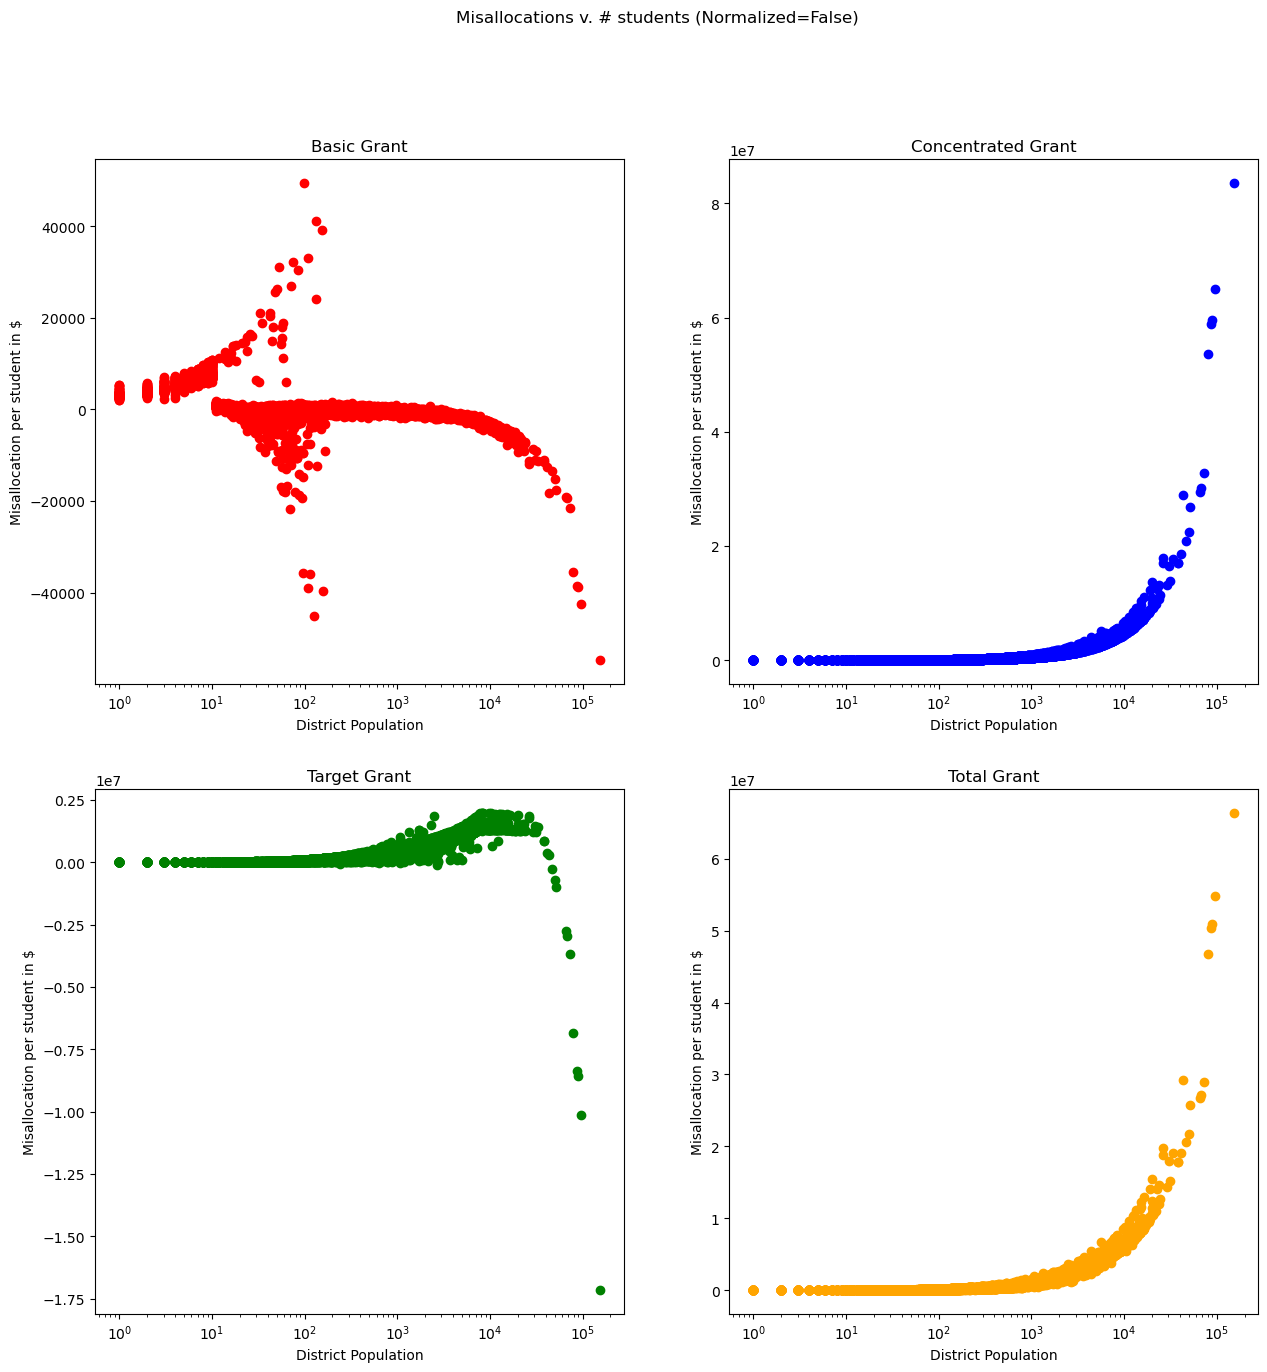

In [58]:
x_axis = df['official_children_formula_count']


def plot_per_capita_misallocations_over_all_states(alloc, normalized=False, ax=None, color=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    errors = df[f'{alloc}_error']
    if normalized:
        errors = errors / df['official_children_formula_count']
    ax.scatter(x_axis, errors, color=color)

    ax.set_title(f'{alloc.capitalize()} Grant')
    ax.set_xlabel('District Population')
    ax.set_ylabel('Misallocation per student in $')
    ax.set_xscale('log')
    # ax.set_xlim(0, 0.8)
    # ax.legend()


# plot_misallocations_over_all_states(['basic', 'concentrated', 'targeted'])
normalized = False
# make 4 figure plot
keys = ["basic", "concentrated", "target", "total"]
colors = ["red", "blue", "green", "orange"]

fig, axs = plt.subplots(2, 2, figsize=(15, 15))
for i, key in enumerate(keys):
    plot_per_capita_misallocations_over_all_states(key, normalized=normalized, ax=axs[i // 2, i % 2], color=colors[i])

fig.suptitle(f'Misallocations v. # students (Normalized={normalized})')

# number of total schools
print(df['official_children_count'].shape)


In [34]:
    df1 = pd.read_csv('out/df_noisy_out_census_dp_rho=2.65_use_constraints=False.csv')
df2 = pd.read_csv('out/data1M/df_noisy_out_census_dp_rho=2.56_hierarchical=False.csv')
df3 = pd.read_csv('out/data1K/df_noisy_out_census_dp_rho=2.56_hierarchical=False.csv')

In [35]:
(df1['avg_noisy_basic_alloc'] - df3['noisy_basic_alloc']).sum()


-1.5564728528261185e-07

In [38]:
(df1['calculated_basic_alloc'] - df2['calculated_basic_alloc']).sum()



0.0